In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(14))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 10080 samples, validate on 1121 samples
Epoch 1/20
10080/10080 [==============================] - 8s 813us/sample - loss: 3.3009 - acc: 0.0885 - val_loss: 2.6005 - val_acc: 0.0847
Epoch 2/20
10080/10080 [==============================] - 6s 623us/sample - loss: 2.3168 - acc: 0.2492 - val_loss: 1.5685 - val_acc: 0.5165
Epoch 3/20
10080/10080 [==============================] - 7s 698us/sample - loss: 1.3393 - acc: 0.5745 - val_loss: 0.8801 - val_acc: 0.7342
Epoch 4/20
10080/10080 [==============================] - 7s 715us/sample - loss: 0.9550 - acc: 0.7083 - val_loss: 0.6993 - val_acc: 0.7823
Epoch 5/20
10080/10080 [==============================] - 7s 692us/sample - loss: 0.7868 - acc: 0.7663 - val_loss: 0.6298 - val_acc: 0.7984
Epoch 6/20
10080/10080 [==============================] - 7s 684us/sample - loss: 0.6878 - acc: 0.8011 - val_loss: 0.6065 - val_acc: 0.8252
Epoch 7/20
10080/10080 [======

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


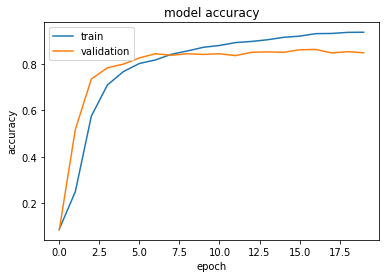

In [3]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


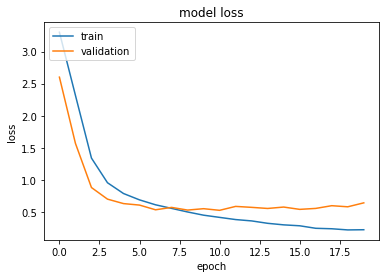

In [4]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [6]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
2801/2801 [==============================] - 0s 146us/sample - loss: 0.6169 - acc: 0.8568
test loss, test acc: [0.6168701118952205, 0.85683686]


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict = model.predict(X_test)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()
predict_class

[9,
 5,
 1,
 12,
 11,
 4,
 8,
 1,
 8,
 7,
 8,
 13,
 0,
 10,
 10,
 9,
 13,
 13,
 13,
 6,
 10,
 6,
 3,
 8,
 4,
 0,
 4,
 10,
 1,
 12,
 13,
 10,
 4,
 9,
 13,
 7,
 10,
 4,
 3,
 13,
 5,
 7,
 0,
 0,
 4,
 0,
 9,
 11,
 10,
 1,
 10,
 9,
 9,
 1,
 8,
 0,
 8,
 1,
 5,
 3,
 6,
 11,
 12,
 0,
 13,
 3,
 7,
 11,
 1,
 7,
 0,
 10,
 13,
 6,
 12,
 9,
 8,
 8,
 3,
 1,
 3,
 13,
 2,
 2,
 5,
 11,
 2,
 13,
 2,
 5,
 5,
 11,
 6,
 9,
 12,
 1,
 8,
 3,
 2,
 12,
 0,
 8,
 3,
 2,
 10,
 4,
 0,
 0,
 2,
 0,
 5,
 8,
 6,
 6,
 11,
 13,
 10,
 3,
 11,
 0,
 4,
 9,
 9,
 0,
 4,
 11,
 8,
 12,
 5,
 12,
 4,
 11,
 2,
 2,
 2,
 0,
 11,
 6,
 0,
 4,
 4,
 10,
 12,
 5,
 10,
 13,
 13,
 3,
 9,
 0,
 5,
 6,
 10,
 6,
 5,
 0,
 7,
 4,
 9,
 8,
 8,
 3,
 7,
 10,
 5,
 5,
 12,
 4,
 8,
 3,
 6,
 4,
 7,
 11,
 9,
 10,
 0,
 13,
 12,
 4,
 0,
 10,
 10,
 2,
 8,
 7,
 10,
 0,
 11,
 11,
 3,
 5,
 10,
 9,
 9,
 2,
 2,
 0,
 11,
 7,
 13,
 11,
 2,
 4,
 7,
 3,
 3,
 8,
 6,
 4,
 3,
 4,
 11,
 12,
 7,
 7,
 9,
 1,
 1,
 12,
 10,
 6,
 3,
 11,
 6,
 8,
 0,
 5,
 4,
 7,
 4,
 5,
 7,


In [20]:
import seaborn as sn
import pandas as pd
cm =confusion_matrix(y_test, predict_class)
cm

array([[174,   2,   1,   6,   0,  11,   1,   3,   1,   0,   1,   2,   0,
          1],
       [  1, 167,   3,   1,   3,   1,   0,   1,   0,   0,   0,   1,   1,
          0],
       [  5,   0, 153,   6,   2,   2,   0,   0,   3,   0,   5,   1,   3,
          2],
       [  1,   0,   5, 176,   2,   2,   0,   2,   0,   0,   2,   0,   0,
          1],
       [  1,   0,   6,   6, 177,   3,   0,   1,   3,   5,   4,   0,   1,
          1],
       [ 16,   1,   0,   0,   3, 154,   1,   2,   0,  19,   1,   0,   3,
          4],
       [  5,   0,   0,   0,   1,   2, 164,  14,   3,   1,   1,   0,   0,
          3],
       [ 11,   2,   2,   1,   1,   1,  10, 159,   1,   1,   4,   0,   0,
          1],
       [  4,   0,   4,   3,   1,   3,   1,   1, 190,   4,   2,   4,   0,
          4],
       [  4,   3,   2,   2,   0,  32,   1,   1,   1, 137,   0,   2,   9,
          7],
       [  2,   2,   2,   6,   0,   0,   0,   0,   1,   4, 184,   4,   0,
          1],
       [  5,   1,   1,   5,   1,   7,   0, 

In [27]:
CATEGORIES = ["airplane", "apple","axe","banana","baseball",
              "bee","bus","car","diamond","grapes","grass","hand",
              "pineapple","tornado"]
df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                  columns = [i for i in CATEGORIES])

df_cm

,airplane,apple,axe,banana,baseball,bee,bus,car,diamond,grapes,grass,hand,pineapple,tornado
airplane,174,2,1,6,0,11,1,3,1,0,1,2,0,1
apple,1,167,3,1,3,1,0,1,0,0,0,1,1,0
axe,5,0,153,6,2,2,0,0,3,0,5,1,3,2
banana,1,0,5,176,2,2,0,2,0,0,2,0,0,1
baseball,1,0,6,6,177,3,0,1,3,5,4,0,1,1
bee,16,1,0,0,3,154,1,2,0,19,1,0,3,4
bus,5,0,0,0,1,2,164,14,3,1,1,0,0,3
car,11,2,2,1,1,1,10,159,1,1,4,0,0,1
diamond,4,0,4,3,1,3,1,1,190,4,2,4,0,4
grapes,4,3,2,2,0,32,1,1,1,137,0,2,9,7


In [30]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 14
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

In [33]:
precision = TP/(TP+FP)
precision

array([0.75324675, 0.92777778, 0.83152174, 0.82242991, 0.92670157,
       0.7       , 0.92134831, 0.85945946, 0.9178744 , 0.78285714,
       0.87619048, 0.92783505, 0.89473684, 0.88789238])

In [32]:
recall = TP/(TP+FN)
recall

array([0.85714286, 0.93296089, 0.84065934, 0.92146597, 0.85096154,
       0.75490196, 0.84536082, 0.81958763, 0.85972851, 0.68159204,
       0.89320388, 0.85308057, 0.96391753, 0.92957746])